In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [33]:
dataset = pd.read_csv(r'C:\Users\Malak\Downloads\StudentsPerformance.csv')

In [34]:
categorical_cols=dataset.select_dtypes(include='object').columns
categorical_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [35]:
for i in categorical_cols:
    print(dataset[i].unique())

dataset.isnull().sum()

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [36]:
dataset['average_score']=(dataset['math score'] + dataset['reading score']+dataset['writing score'])/3

In [37]:
gender = {
    'male':1,
    'female':0
    
}

In [38]:
race={
    'group A':0,
    'group B':1,
    'group C':2,
    'group D':3,
    'group E':4
}

In [39]:
dataset['gender'] = dataset['gender'] .map(gender)

In [40]:
dataset['race/ethnicity'] = dataset['race/ethnicity'] .map(race)
dataset

gender  race/ethnicity parental level of education         lunch  \
0         0               1           bachelor's degree      standard   
1         0               2                some college      standard   
2         0               1             master's degree      standard   
3         1               0          associate's degree  free/reduced   
4         1               2                some college      standard   
..      ...             ...                         ...           ...   
995       0               4             master's degree      standard   
996       1               2                 high school  free/reduced   
997       0               2                 high school  free/reduced   
998       0               3                some college      standard   
999       0               3                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     average_score  
0        72.666667  
1        82.333333  
2        92.666667  
3        49.333333  
4        76.333333  
..             ...  
995      94.000000  
996      57.333333  
997      65.000000  
998      74.333333  
999      83.000000  

[1000 rows x 9 columns]

In [41]:
level ={
    "bachelor's degree":0,
    'some college':1,
    "master's degree":2,
    "associate's degree":3,
    'high school':4,
    'some high school':5
}
dataset['parental level of education']= dataset['parental level of education'].map(level)
dataset

gender  race/ethnicity  parental level of education         lunch  \
0         0               1                            0      standard   
1         0               2                            1      standard   
2         0               1                            2      standard   
3         1               0                            3  free/reduced   
4         1               2                            1      standard   
..      ...             ...                          ...           ...   
995       0               4                            2      standard   
996       1               2                            4  free/reduced   
997       0               2                            4  free/reduced   
998       0               3                            1      standard   
999       0               3                            1  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     average_score  
0        72.666667  
1        82.333333  
2        92.666667  
3        49.333333  
4        76.333333  
..             ...  
995      94.000000  
996      57.333333  
997      65.000000  
998      74.333333  
999      83.000000  

[1000 rows x 9 columns]

In [42]:
lunch = {
    'standard':1,
    'free/reduced':0
} 
dataset['lunch'] = dataset['lunch'].map(lunch)

In [43]:
prep_course = {
    'none' :1,
    'completed':0
}
dataset['test preparation course'] = dataset['test preparation course'].map(prep_course)

In [44]:
x= dataset.drop(columns='average_score').values

In [45]:
y= dataset['average_score'].values

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.25,random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred = model.predict(x_test)

In [49]:
from sklearn.metrics import r2_score
r2_percentage = r2_score(y_pred, y_test) * 100
print(f"R-squared: {r2_percentage:.2f}%")

R-squared: 100.00%


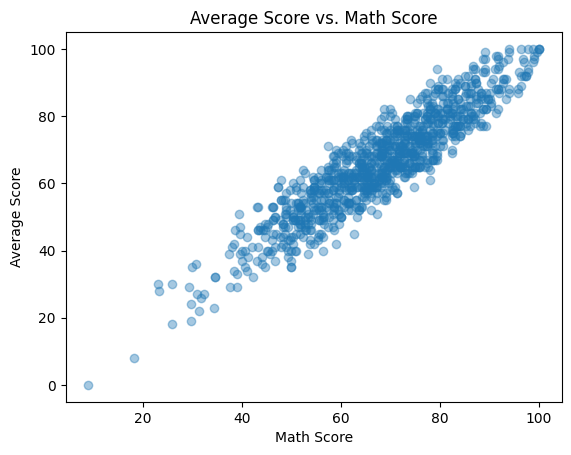

In [50]:
plt.scatter(dataset['average_score'],dataset['math score'],alpha=0.4)
plt.xlabel('Math Score')
plt.ylabel('Average Score')
plt.title('Average Score vs. Math Score')
plt.show()

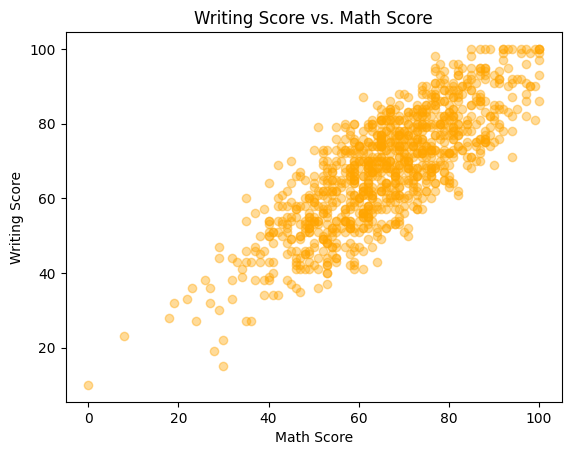

In [51]:

plt.scatter(dataset['math score'],dataset['writing score'],alpha=0.4,color='orange')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Writing Score vs. Math Score')
plt.show()

In [52]:
 model.predict(x_test)

array([87.        , 64.        , 75.        , 74.66666667, 81.66666667,
       78.        , 67.33333333, 59.        , 77.33333333, 48.66666667,
       47.        , 26.        , 76.        , 58.33333333, 83.66666667,
       75.        , 49.        , 48.33333333, 53.33333333, 61.33333333,
       73.33333333, 49.33333333, 62.66666667, 44.        , 79.33333333,
       77.33333333, 72.        , 50.        , 41.        , 55.66666667,
       60.        , 67.        , 60.33333333, 73.        , 77.33333333,
       51.        , 76.        , 74.33333333, 75.        ,  9.        ,
       78.        , 64.33333333, 65.33333333, 61.33333333, 84.        ,
       65.66666667, 71.        , 29.33333333, 86.33333333, 78.66666667,
       72.        , 71.33333333, 78.66666667, 54.        , 71.66666667,
       72.33333333, 83.        , 54.66666667, 81.66666667, 89.        ,
       43.33333333, 80.66666667, 79.        , 61.66666667, 87.66666667,
       73.66666667, 65.        , 54.66666667, 64.66666667, 88.66

In [53]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=6) 
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [55]:
y_pred = model.predict(x_test)

In [56]:
print(X_train)

[[ 1.06333523 -1.89118805 -0.98836621 ... -1.11132647 -1.59453623
  -0.98844821]
 [-0.94043719 -1.02736891  1.3837127  ... -0.1072771   0.8575186
   0.62886547]
 [-0.94043719 -0.16354976 -0.39534649 ... -0.97745322 -0.33347946
  -0.51673172]
 ...
 [-0.94043719 -0.16354976  0.19767324 ... -0.91051659 -0.54365559
  -1.05583628]
 [ 1.06333523 -0.16354976 -0.98836621 ... -1.11132647 -1.52447752
  -1.05583628]
 [-0.94043719  0.70026939  0.19767324 ...  1.23145539  1.48804699
   1.37013424]]


In [57]:
print(X_test)

[[-0.94043719 -0.16354976  0.19767324 ...  1.63307514  1.13775344
   1.03319389]
 [-0.94043719 -1.02736891 -0.98836621 ... -0.91051659 -0.26342075
   0.29192512]
 [ 1.06333523  0.70026939 -1.58138594 ...  0.89677227  0.22699022
   0.22453705]
 ...
 [ 1.06333523 -1.89118805 -1.58138594 ...  0.89677227  0.57728377
   0.83102968]
 [ 1.06333523  0.70026939  0.79069297 ... -1.64681946 -2.1550059
  -2.3362096 ]
 [ 1.06333523  1.56408854  0.19767324 ...  2.03469489  0.8575186
   1.30274617]]


In [58]:
from sklearn.metrics import r2_score
print(r2_score(y_pred, y_test))

0.989759871939764


In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=6),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [60]:
best_k = grid_search.best_params_['n_neighbors']

In [61]:
model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}%")
print(f"Mean Absolute Error: {mae:.2f}%")
print(f"R-squared: {r2:.2%}")

Mean Squared Error: 1.89%
Mean Absolute Error: 0.58%
R-squared: 99.15%
